# Tache 1.2

## Modèles de Embeddings

- L'idée est de chercher les mots proches sémantiquement des termes primaires ou secondaires que nous avons déjà en utilisant les embeddings de ces termes.  
- On peut faire cela avec plusieurs embedders, qui ont également utile pour une extension sémantique par exemple :  Word2Vec, BERT, Glove...

### fasttext

pip install fasttext==0.9.3

wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.bin.gz

gunzip cc.fr.300.bin.gz

In [16]:
import fasttext

modelFastext = fasttext.load_model("/teamspace/studios/this_studio/cc.fr.300.bin") 

keywords = ["Vie en autarcie", "Autosuffisance", "Fermentation","Poêle de masse"]

for keyword in keywords:
    similar_words = modelFastext.get_nearest_neighbors(keyword, k=3)
    print(f"Expansions pour '{keyword}': {similar_words} \n")

Expansions pour 'Vie en autarcie': [(0.6295375227928162, 'quasi-autarcie'), (0.5857999920845032, 'Autarcie'), (0.5106639266014099, 'aiutarci')] 

Expansions pour 'Autosuffisance': [(0.6425352096557617, 'autosuffisance'), (0.6188276410102844, 'Auto-suffisance'), (0.5622236728668213, 'auto-suffisance')] 

Expansions pour 'Fermentation': [(0.6766241788864136, 'fermentation'), (0.6169770956039429, 'Fermentations'), (0.5800446271896362, 'fermentations')] 

Expansions pour 'Poêle de masse': [(0.5726413130760193, 'Poêlerie'), (0.5305557250976562, 'Plebs.3x08.FR.FBK.zipRelease'), (0.5272475481033325, 'policeAlcalaAmiralBerettaBlooCaporalColonelLeBeauneLeChaufferieLeFrançoisMaaxMaaxMonoMaaxRoundedNorrPlaakRobinAlcala')] 



### Word2Vec

pip install gensim==4.3.3

#### Google News model

In [1]:
import gensim.downloader as api

modelGoogleNews = api.load("word2vec-google-news-300") 
similar_words = modelGoogleNews.most_similar("fermentation", topn=3)
print(f"Similar words to 'fermentation': {similar_words}")

Similar words to 'fermentation': [('secondary_fermentation', 0.7000930905342102), ('yeast', 0.6928147077560425), ('malolactic_fermentation', 0.6912585496902466)]


#### French Model

In [12]:
from gensim.models import KeyedVectors

model_path = '/teamspace/studios/this_studio/frWac.bin'
modelFrench = KeyedVectors.load_word2vec_format(model_path, binary=True, unicode_errors="ignore")

mots = [
    "potager", "filtre berkey", "permaculture", "filtre doulton", "poêle à bois bouilleur", 
    "poêle de masse", "cuve eau pluie", "maison terre-paille", "maison torchis", "ferme en pierre",
    "maraîchage", "culture lasagnes", "aquaponie", "agroforesterie", "forage manuel", 
    "puits artésien", "filtration naturelle", "biogaz maison", "kerterre", "fermentation", "fumage",
    "autosuffisance", "autonomie alimentaire", "autonomie énergétique", "autonomie en eau", 
    "vie en autarcie", "habitats autonomes"
]


mots_present = 0
mots_absent = 0
mots_similaires = []

for mot in mots:
    if mot in modelFrench:
        mots_present += 1
        similar_words = modelFrench.most_similar(mot, topn=3)
        mots_similaires.append((mot, similar_words))
    else:
        mots_absent += 1

pourcentage_absents = (mots_absent / len(mots)) * 100

for mot, similar_words in mots_similaires:
    print(f"\nMots similaires à '{mot}':")
    for word, similarity in similar_words:
        print(f"  {word}: {similarity}")


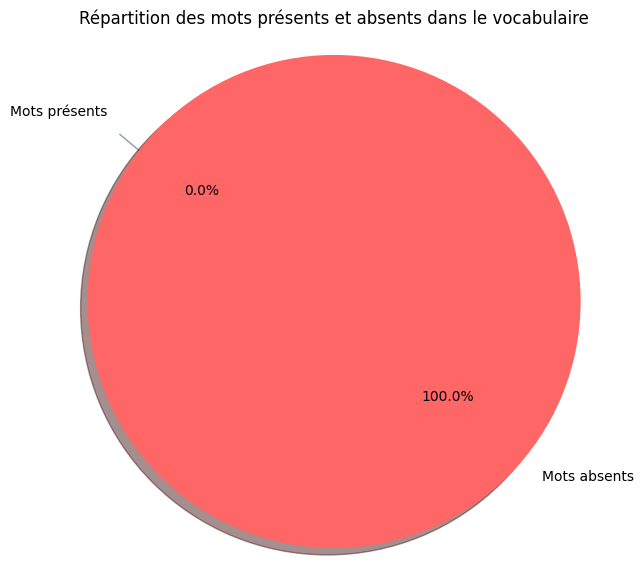

In [13]:
import matplotlib.pyplot as plt

labels = ['Mots présents', 'Mots absents']
sizes = [mots_present, mots_absent]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Répartition des mots présents et absents dans le vocabulaire')
plt.show()